In [1]:
!pwd

/Users/yibeihu/BestBuy_sales_forecast


In [2]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.version

'3.8.5 (default, Sep  4 2020, 02:22:02) \n[Clang 10.0.0 ]'

In [3]:
%load_ext autoreload 
%autoreload 2

### Load in data

In [4]:
sell_df = pd.read_csv("./data/Hackathon Data.csv")
sell_df.shape

(846632, 11)

In [12]:
sell_df['PROMO_PRICE'] = sell_df['PROMO_PRICE'].replace('?', float('nan')).astype(float)
sell_df['COMPETITOR_PRICE'] = sell_df['COMPETITOR_PRICE'].replace('?', float('nan')).astype(float)
sell_df['SALES_DATE'] = pd.to_datetime(sell_df['SALES_DATE'])

In [15]:
sell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846632 entries, 0 to 846631
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Encoded_SKU_ID    846632 non-null  int64         
 1   SALES_DATE        846632 non-null  datetime64[ns]
 2   SUBCLASS_NAME     846632 non-null  object        
 3   CLASS_NAME        846632 non-null  object        
 4   ML_NAME           846632 non-null  object        
 5   CATEGORY_NAME     846632 non-null  object        
 6   RETAIL_PRICE      846632 non-null  float64       
 7   PROMO_PRICE       146154 non-null  float64       
 8   COMPETITOR_PRICE  311281 non-null  float64       
 9   Inventory         846632 non-null  object        
 10  DAILY_UNITS       846632 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 71.1+ MB


We see that our data is having 11 columns, among which 4 cols are numerical, 1 col is date, and the others are str.

### EDA

In [13]:
#The total num of unique Subclass
n_subclass = len(df.SUBCLASS_NAME.unique())
n_class = len(df.CLASS_NAME.unique())
n_ml = len(df.ML_NAME.unique())
n_category = len(df.CATEGORY_NAME.unique())
print('number of category: ', n_category,'\n',
     'number of ml: ', n_ml,'\n',
     'number of class: ', n_class,'\n',
     'number of subclass: ', n_subclass,'\n',)

number of category:  3 
 number of ml:  8 
 number of class:  25 
 number of subclass:  116 



In [17]:
sub_dis = sell_df.groupby(by=['CLASS_NAME'], as_index= False\
                      ).agg({'Encoded_SKU_ID': lambda x: x.nunique(),\
                             'DAILY_UNITS':np.mean,\
                            'RETAIL_PRICE':np.median})
sub_dis.sort_values('Encoded_SKU_ID', ascending = False, inplace = True)

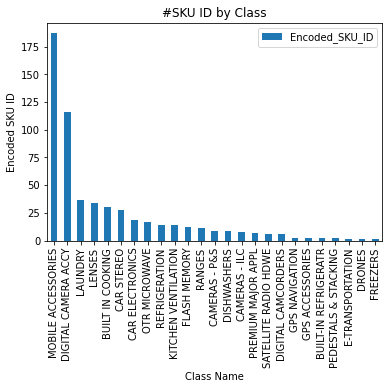

In [19]:
sub_dis.plot(x='CLASS_NAME', y='Encoded_SKU_ID', kind='bar')
plt.title('#SKU ID by Class')
plt.xlabel('Class Name')
plt.ylabel('Encoded SKU ID')
plt.show()

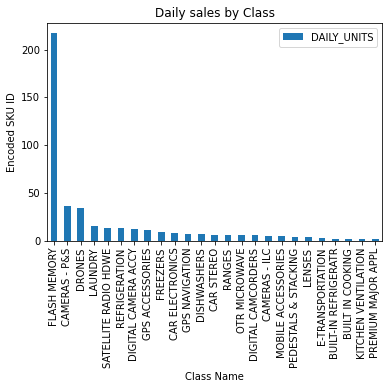

In [23]:
sub_dis.sort_values('DAILY_UNITS', ascending = False, inplace = True)
sub_dis.plot(x='CLASS_NAME',y='DAILY_UNITS',kind='bar')
plt.title('Daily sales by Class')
plt.xlabel('Class Name')
plt.ylabel('Encoded SKU ID')
plt.show()

In [26]:
sku_grp = sell_df.groupby(["Encoded_SKU_ID"]).agg(
    {"DAILY_UNITS":["mean","std"],\
    "SALES_DATE":["min","max"]}
)

sku_grp.columns = ["sales_mean","sales_std","date_min","date_max"]

In [27]:
sku_grp.head()

,sales_mean,sales_std,date_min,date_max
Encoded_SKU_ID,,,,
1,2.268047,1.886818,2017-05-28,2022-07-31
2,12.576943,9.140281,2017-05-28,2022-07-31
3,2.430903,2.366147,2017-06-04,2022-07-31
4,4.520468,3.591465,2018-04-01,2022-07-31
5,4.626124,3.086124,2017-05-28,2022-07-31


In [28]:
np.corrcoef(sku_grp["sales_mean"],sku_grp["sales_std"])

array([[1.        , 0.97577833],
       [0.97577833, 1.        ]])

In [29]:
sku_grp["date_max"].value_counts()

2022-07-31    556
2022-07-30     14
2022-07-23      2
2022-06-25      1
2022-07-09      1
2021-11-20      1
Name: date_max, dtype: int64

Text(0.5, 1.0, 'daily sale unit of SKU1')

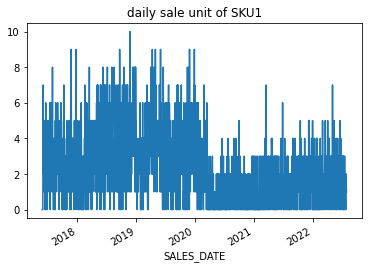

In [31]:
sku1_sales = sell_df[sell_df.Encoded_SKU_ID==1]
sku1_sales.index = sku1_sales.SALES_DATE
sku1_sales["DAILY_UNITS"].plot()
plt.title('daily sale unit of SKU1')

After EDA we found that:\
    1. Sales performance varies between SKUs\
    2. Sales performance varies between classes\
    3. The SKUs with high sales also has high volatility.\
Then, we used Tableau to visualize the data. We categorized the data into three categories, according to their past behaviors.

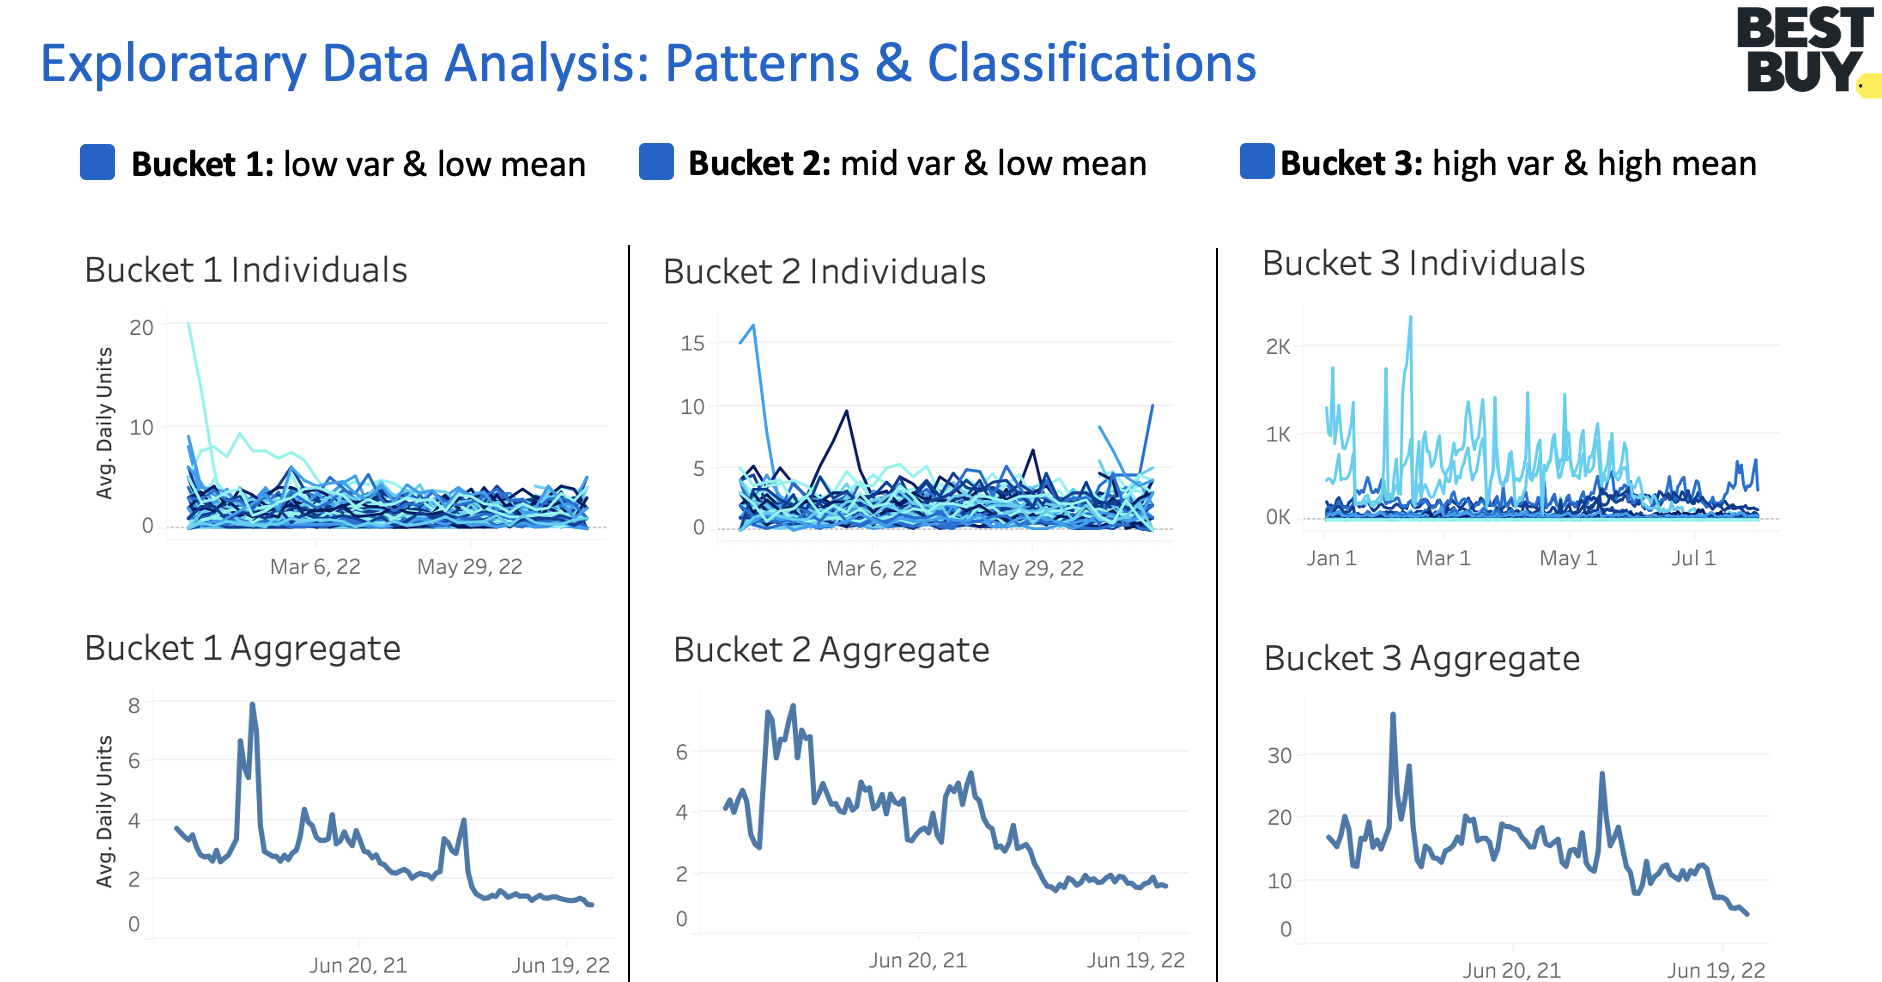